<a href="https://colab.research.google.com/github/GabrielaRomoM/EjerciciosSYS-Python/blob/main/3FOURIER/THD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DISTORSIÓN TOTAL DE ARMONICOS (THD)**

La Distorsión Armónica Total (THD) es una medida de cuánto se «distorsiona» o se cambia la forma de onda del voltaje o de la corriente de su forma de onda sinusoidal convencional. La energía proviene de su suministrador eléctrico en forma de onda sinusoidal limpia. A medida que atraviesa diferentes tipos de cargas, el voltaje y la corriente se utilizan a diferentes tasas, lo que provoca que la distorsión se refleje desde la carga hacia el sistema.

La distorsión ocurre principalmente en múltiplos de la frecuencia de la portadora (50 o 60 Hz) que se conocen como armónicos. Por ejemplo, el 3er armónico en una línea de 60 Hz sería de 180 Hz, el 7 ° sería 420 Hz. La THD es el porcentaje acumulado de distorsión para todos los tipos de armónicos en relación a la potencia total. La distorsión se mide por separado para la corriente (THDI) y el voltaje (THDV).

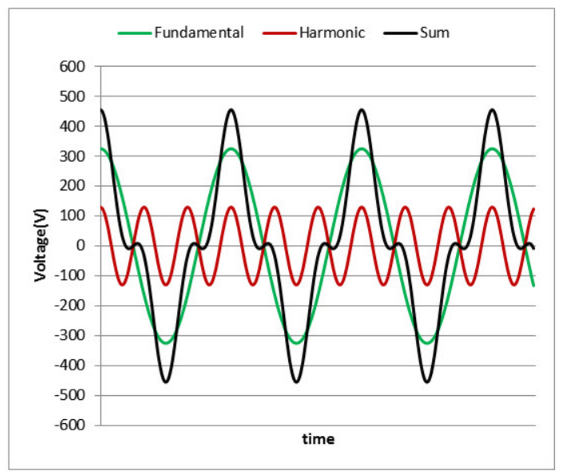

**FACTOR DE POTENCIA**

Se define el factor de potencia como la razón entre la potencia activa P y la potencia aparente S: f.d.p= P/S

Es importante distinguir la diferencia entre los términos factor de potencia
(f.d.p.) Y cos φ, ya que no son exactamente lo mismo. En cargas lineales, ambos valores coinciden. Sin embargo, en cargas no lineales el f.d.p. y cos φ son distintos.

Se dice que:

- Un factor de potencia adelantado significa que la corriente se adelanta con respecto a la tensión, lo que implica carga capacitiva. Potencia reactiva negativa.
- Un factor de potencia atrasado significa que la corriente se retrasa con respecto a la tensión, lo que implica carga inductiva. Potencia reactiva positiva.

El dispositivo utilizado para medir el f.d.p. se denomina cosímetro.

***Circuitos lineales***

En circuitos lineales, donde las corrientes y tensiones son perfectamente senoidales, se tiene:

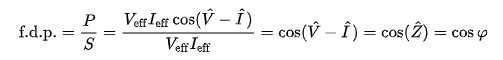

El f.d.p es el coseno del ángulo que forman los fasores de la corriente y la tensión. En este caso se puede observar que   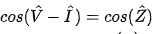      donde Z es la impedancia equivalente del sistema. A partir de esto se puede entender el
cos φ como una medida de la habilidad del elemento Z para absorber potencia activa. Para una resistencia ideal: f.d.p= cos(0)=1. Para una inductancia y condensador ideales: f.d.p.= cos(π/2)=0.

Así como el triángulo de potencia relaciona P, Q, S, y el f.d.p., el triángulo de impedancia (no mostrado en este artículo) relaciona R, X, Z (magnitud de la impedancia), y el f.d.p. De este último triángulo se desprende que el factor de potencia también es:

f.d.p= R/Z

***Circuitos No lineales***

En circuitos no lineales la forma de la onda no es perfectamente senoidal. Las cargas no lineales crean corrientes armónicas, que pueden ser representadas por la distorsión armónica total (THD). En este caso la potencia aparente S no estaría únicamente compuesta por P y Q, sino que aparecería una tercera componente suma de todas las potencias que genera la distorsión. A esta componente de distorsión se le denomina D. En este caso, el factor de potencia es:

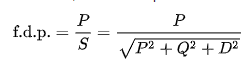

Mientras que cos φ se calcula tan solo con las componentes fundamentales (sin armónicos):

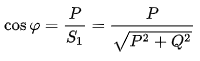

Si THD es la tasa de distorsión armónica, I1Rms es la componente fundamental de la corriente eficaz, IRms es la corriente eficaz total y considerando una fuente ideal de tensión, entonces la relación entre el factor de potencia y
cos φ es:

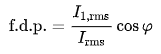

El término factor de potencia es una generalización del cos φ

Esto es importante en sistemas reales que albergan cargas no lineales tales como rectificadores, algunas formas de iluminación, fuentes de alimentación conmutadas, hornos de arco eléctrico, instrumentos de soldadura, variadores de velocidad y otros tipos de dispositivos.

***Calculo THD desde FFT***

Se puede calcular el THD a partir de una FFT de la siguiente manera:

- Tomar la señal de interés y realizar una FFT para obtener su representación en el dominio de la frecuencia.
- Observar los picos en el espectro de frecuencia obtenido a través de la FFT. Cada pico representa una componente armónica.
- Para cada pico en el espectro, obtener su amplitud.
- Calcular el THD:

$$ \text{THD} = \frac{\sqrt{\text{Suma de cuadrados de las amplitudes de las armónicas}}}{\text{Amplitud de la componente fundamental}} $$

Donde:
La componente fundamental generalmente es el primer pico en el espectro (frecuencia fundamental) y la suma de cuadrados de las amplitudes de las armónicas incluye las amplitudes de todos los picos excepto el primero.

**¿Cómo puede calcularse la distorsion del factor de potencia con base al THD?***

El factor de potencia y la distorsión armónica total están relacionados en el contexto de la calidad de la energía eléctrica. La fórmula para calcular el factor de potencia con base en el THD es:

$$ f.d.p = \frac{1}{\sqrt{1 + \text{THD}^2}} $$

La distorsión del factor de potencia (DFP) se puede calcular mediante la siguiente fórmula:

$$ DFP = \sqrt{1 - FP^2} $$

La distorsión del factor de potencia es una medida de la componente de corriente no sinusoidal en relación con la corriente total.

**EJEMPLO ILUSTRATIVO PARA EL CÁLCULO DEL THD Y LA DISTORSIÖN DEL FACTOR DE POTENCIA**

In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
#%matplotlib inline
import scipy.signal as sig
import scipy.optimize as opt
#from IPython.display import Image
import sympy as sym
#sym.init_session()

*Modelo Laplace Circuito RC serie Cálculo función de transferencia*

In [3]:
s = sym.symbols('s', complex=True) #definir variable compleja s
t, R, L, C = sym.symbols('t R L C', positive = True) #definir variables de la función como positivos
Vin = sym.Function('Vin')(s) #definir variable x que depende de s
Vc = 1/(R*C*s + 1) * Vin #voltaje capacitor = voltaje de salida
Vc

Vin(s)/(C*R*s + 1)

In [4]:
Rv = int(input("Ingrese un valor de resistencia en ohms: "))
Cv = float(input("Ingrese un valor de capacitancia en faradios: "))
print("\n")
VcRC = Vc.subs(R, Rv).subs(C, Cv) #sustituir los valores en la fórmula de sympy
VcRC

Ingrese un valor de resistencia en ohms: 200
Ingrese un valor de capacitancia en faradios: 0.001




Vin(s)/(0.2*s + 1)

In [5]:
#función de transfeencia con scipy
num = np.array([1])
den = np.array([Rv*Cv,1]) #el numerador y el denominador de la función de transfeencia deben ser array para que funcione con scipy
Gn = sig.TransferFunction(num,den) #funciona como una clase
print(num)
print(den)

[1]
[0.2 1. ]


*Evaluar el sistema ante una entrada y salida en array*

In [6]:
Fo = 60 #frec alimentación
Fs = 30*Fo #frecuencia muestreo
To = 1/Fo #periodo fundamental
Ts = 1/Fs #periodo muestreo
t = np.arange(0, 5*To,Ts) # se simulan 5 periodos de alimentación con un muestreo segun Ts
A = 120 #amplitud entrada
#función de entrada aproximada como onda senoidal rectificada completa
in_ = A*(np.sin(2*np.pi*Fo*t)) #señal de entrada
rec_c = sig.square(2*np.pi*Fo*t)#función tren de pulsos para simular señal rectificada
in_r = in_ * rec_c #para rectificar la señal de entrada
out = Gn.output(in_r, T=t)[1] #evaluar salida ante entrada rectificada mediante aproximacion numérica de scipy

Text(0, 0.5, 'Amplitud')

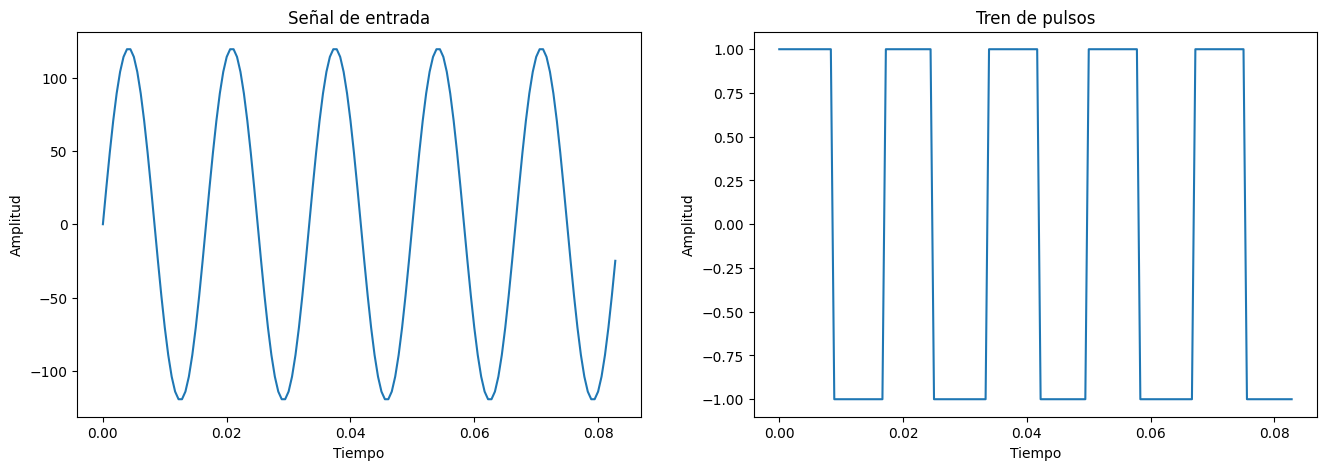

In [7]:
plt.figure(figsize=(16,5))
plt.subplot(121)
plt.plot(t,in_)
plt.title("Señal de entrada")
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

plt.subplot(122)
plt.plot(t, rec_c)
plt.title("Tren de pulsos")
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

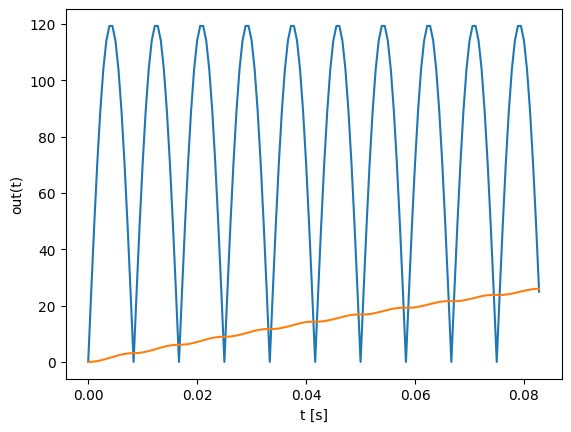

In [8]:
plt.plot(t, in_r,label='In(t)')#entrada rectificada
plt.plot(t, out,label='Out(t)')#salida del circuito
plt.xlabel('t [s]')
plt.ylabel('out(t)')
plt.show()

*Espectro con FFT*

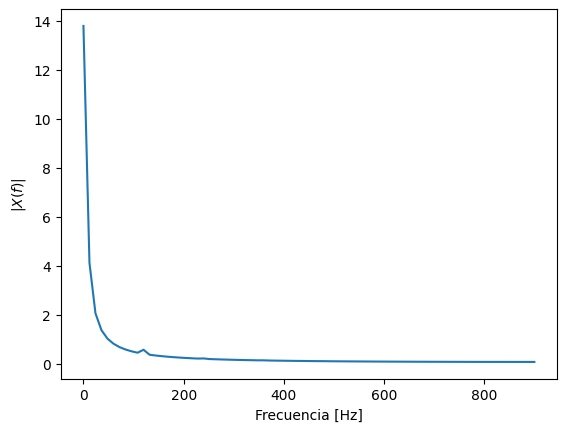

In [9]:
vfre = np.fft.rfftfreq(len(out),1/Fs) #vector de frecuencia en Hz segun tamaño del vector y tiempo de muestreo
Xf = np.fft.rfft(out)

plt.plot(vfre,abs(Xf/len(out)))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('$|X(f)|$')
plt.show()

*Cálculo de la distorsión total de armónicos*

In [10]:
# Calcular THD
freqfun = 60  #Frecuencia fundamental en Hz
funidx = np.argmin(np.abs(vfre - freqfun))
ampfun = np.abs(Xf[funidx])

amparm = np.abs(Xf)
amparm [funidx] = 0  #Elimina la componente fundamental

thd = np.sqrt(np.sum(amparm**2)/ampfun**2)

print(f"Distorsión Total de Armónicos (THD): {thd:.2f}")

# Calcular la distorsión del factor de potencia
real_power = np.mean(out**2)
apparent_power = np.mean(np.abs(out)**2)

pf_distortion = np.sqrt((apparent_power - real_power) / apparent_power)

print(f"Distorsión del Factor de Potencia: {pf_distortion:.2f}")

Distorsión Total de Armónicos (THD): 17.81
Distorsión del Factor de Potencia: 0.00
